In [2]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#for my windows10 laptop I had to install this package using pip rather than anaconda.  
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
import subprocess
#import networkx as nx
import scipy.stats as stats
#import statsmodels.api as sm
#import scipy.spatial.distance as spd
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

from Bio import SeqIO
from Bio import SeqFeature as sf
#from Bio.Alphabet import generic_dna
#from Bio.Seq import Seq
import gffutils

import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No ")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node  #the last three are for visualization
# In order to view ete3 created trees on the gpucluster, you need to use a virtual X server:
from pyvirtualdisplay import Display
display = Display(visible=False, size=(1024, 768), color_depth=24)
display.start()
#ete3 is not officially supported on windows, and so must be loaded via pip: 
# pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

spec_lookup = {'Klac' : 'Kluyveromyces lactis', 'Scer': 'Saccharomyces cerevisiae', 
 'Cgla' : 'Candida glabrata' , 'Ncas': 'Naumovozyma castellii', 
 'Sbay' : 'Saccharomyces bayanus', 'Smik': 'Saccharomyces mikatae',
 'Lwal' : 'Lachancea waltii', 'Spar' : 'Saccharomyces paradoxus', 
 'Lklu' : 'Lachancea kluyverii', 'Dhan': 'Debaryomyces hansenii', 
 'Calb' : 'Candida albicans', 'Ylip': 'Yarrowia lipolytica'}

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
Added /home/heineike/github/expression_broad_data to path: 
['', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's

STRE enrichment in diff exp paralogs

Supp: All PKA genes are enriched in STRE, TATA box, PDS in S.Cer

High fold change diff expressed orthologs are enriched in STRE, TATA box, PDS (DREME, AME) while low FC and K.lac are not

Supp: Visualize location of these three elements in all 91? (FIMO)

For all 91 look across phylogenetic tree at promoters Get orthologs (synteny mapping??) Get promoters [] Issue intergenic regions or just fixed amount before ATG? Extract features from promoters: Exact matches (location, direction) STRE STRE + 1 base PDS Flexible matches (Location, direction, score) STRE PDS TATA box Display features across phylogenetic tree For a given example visualize all elements across phylogenetic tree Number of STRE, PDS, TATA box

STRE evolution in diff exp paralogs

Msn2/4 targets in diff exp paralogs

Rph1/Gis1 targets in diff exp paralogs

In [68]:
# Import Data

# PKA enriched genes in S.Cer
target_sets_dict = {}
promoters = {}

for spec in ['SC', 'KL']:
    fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/20181203_r1g1_m24_pka_targets_' + spec + '.pkl')
  
    with open(fname, 'rb') as file:
        target_sets_dict[spec] = pickle.load(file)


    # S.Cer promoters
    #Read in the SC promoter database.  

    promoters[spec] = pd.read_pickle(data_processing_dir + os.path.normpath(spec.lower() + "_promoters/" + spec.lower() + "_promoters.pkl"))


#Load GOI ohnolog data

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)




# STRE enrichment in KL and SC

In [ ]:
# Make fasta file for promoters of interest for all pkainh act genes
gene_set_name = 'pkainh_act'
for spec in ['SC', 'KL']: 
    target_promoter_fname = data_processing_dir + os.path.normpath( spec.lower() + '_promoters/promoter_sets/' + spec.lower() + '_' + gene_set_name + '_20181214.fasta')
    io_library.write_promoter_file(promoters[spec], list(target_sets_dict[spec][0][gene_set_name]),target_promoter_fname)

In [166]:
# Make fasta files for GOI: 

#SC Low and high

for level in ['low', 'high']:
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
    io_library.write_promoter_file(promoters['SC'], list(ohnologs_goi['sc_genename_' + level]),target_promoter_fname) 

#KL orthologs
#Load KL ortholog data
kl_orthologs = pd.read_pickle(data_processing_dir + "ortholog_files_YGOB/kl_orthologs.pkl")

#Merge k.lac rlog data with ohnolog_gois
ohnologs_goi_klorth = ohnologs_goi.merge(kl_orthologs, how='inner', left_on='sc_genename_low',right_on='sc_genename')

target_promoter_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
io_library.write_promoter_file(promoters['KL'], list(ohnologs_goi_klorth['kl_genename']),target_promoter_fname) 



In [219]:
#Enrichment in KL and SC genes activated by PKA inhibition

output_format = 'count'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'}   
sequence_context = 2

#Get counts for various sets
prom_counts = {}
for spec in ['KL', 'SC']:
    prom_counts_spec = {}
    for prom_set in ['all_' + spec.lower() + '_promoters',  spec.lower() + "_pkainh_act_20181214" ]:
        promoters_fname = data_processing_dir + os.path.normpath(spec.lower() + "_promoters/promoter_sets/" + prom_set + ".fasta")
        prom_counts_spec[prom_set] = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)
    prom_counts[spec] = prom_counts_spec

for level in ['low', 'high']: 
    promoters_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_ohnologs_goi_' + level + '_20181218.fasta')
    prom_counts['SC']['ohnolog_goi_' + level] = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)

promoters_fname = data_processing_dir + os.path.normpath('kl_promoters/promoter_sets/kl_ohnologs_goi_20181218.fasta')
prom_counts['KL']['ohnolog_goi'] = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context)

#Add sc common name column for prom counts
prom_counts['SC']['ohnolog_goi_high']['SC_common_name']=io_library.SC_common_name_lookup(prom_counts['SC']['ohnolog_goi_high'].index)


#Do Fisher's exact test on a set of comparisons

comparisons = {'SC' : {'sc_pkainh_act_v_all': ('sc_pkainh_act_20181214', 'all_sc_promoters'), 
                       'goi_high_v_all': ('ohnolog_goi_high', 'all_sc_promoters'), 
                       'goi_low_v_all': ('ohnolog_goi_low', 'all_sc_promoters'), 
                       'goi_high_v_goi_low': ('ohnolog_goi_high', 'ohnolog_goi_low'), 
                       
                      }, 
               'KL' : {'kl_pkainh_act_v_all': ('kl_pkainh_act_20181214', 'all_kl_promoters'),
                       'goi_kl_orth_v_all': ('ohnolog_goi','all_kl_promoters')
                      }
              }

output = {'Motif': list(motif_dict.keys())}
for spec in ['SC', 'KL']: 
    print(spec)
    for comparison_name, comparison in comparisons[spec].items(): 
        print(comparison_name)
        pct_hits_motif = []
        pct_total_motif = []
        pvals_motif = []
        for motif_name in motif_dict.keys():
            #The first comparison is never a total so no need to look for that
            N1_hits = sum(prom_counts[spec][comparison[0]][motif_name + '_count']>0)
            N1_total = len(prom_counts[spec][comparison[0]])

            print('N ' + motif_name + ' in promoters of ' + comparison[0] + ' : ' + str(N1_hits))
            print('N total promoters for ' + comparison[0] + ' : ' + str(N1_total))
            
            pct_hits_motif.append(N1_hits/N1_total)
            
            #The second comparison set might be a total
            if comparison_name.split('_v_')[1]=='all': 
                N_all_hits = sum(prom_counts[spec][comparison[1]][motif_name + '_count']>0)
                N_all_total = len(prom_counts[spec][comparison[1]])
                N2_hits = N_all_hits-N1_hits
                N2_total = N_all_total - N1_total
                print('N ' + motif_name + ' in promoters of ' + comparison[1] + ' : ' + str(N_all_hits))
                print('N total promoters for ' + comparison[1] + ' : ' + str(N_all_total))
                
                pct_total_motif.append(N_all_hits/N_all_total)
                
            else: 
                N2_hits = sum(prom_counts[spec][comparison[1]][motif_name + '_count']>0)
                N2_total = len(prom_counts[spec][comparison[1]])

                print('N ' + motif_name + ' in promoters of ' + comparison[1] + ' : ' + str(N2_hits))
                print('N total promoters for ' + comparison[1] + ' : ' + str(N2_total))  
                
                pct_total_motif.append(N2_hits/N2_total)
    
            oddsratio, pvalue = stats.fisher_exact([[N1_hits, N2_hits],
                                                [N1_total, N2_total]], 
                                                  alternative = 'two-sided')
            
            #add pvalue to output
            pvals_motif.append(pvalue)

        output[comparison_name + '_pct_hits'] = pct_hits_motif
        output[comparison_name + '_pct_total'] = pct_total_motif
        output[comparison_name + '_pval'] = pvals_motif


output_df = pd.DataFrame.from_dict(output, orient='columns') #index = motif_dict.keys())
output_df.set_index('Motif', inplace=True)

output_fname = data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/STRE_TATA_PDS_enrichment_20181218.csv")

output_df.to_csv(output_fname)

SC
sc_pkainh_act_v_all
N STRE in promoters of sc_pkainh_act_20181214 : 383
N total promoters for sc_pkainh_act_20181214 : 509
N STRE in promoters of all_sc_promoters : 2928
N total promoters for all_sc_promoters : 6674
N TATA in promoters of sc_pkainh_act_20181214 : 360
N total promoters for sc_pkainh_act_20181214 : 509
N TATA in promoters of all_sc_promoters : 3852
N total promoters for all_sc_promoters : 6674
N PDS in promoters of sc_pkainh_act_20181214 : 158
N total promoters for sc_pkainh_act_20181214 : 509
N PDS in promoters of all_sc_promoters : 1403
N total promoters for all_sc_promoters : 6674
goi_high_v_all
N STRE in promoters of ohnolog_goi_high : 77
N total promoters for ohnolog_goi_high : 91
N STRE in promoters of all_sc_promoters : 2928
N total promoters for all_sc_promoters : 6674
N TATA in promoters of ohnolog_goi_high : 66
N total promoters for ohnolog_goi_high : 91
N TATA in promoters of all_sc_promoters : 3852
N total promoters for all_sc_promoters : 6674
N PDS in pro

In [214]:
pval_df

,sc_pkainh_act_v_all,goi_high_v_all,goi_low_v_all,goi_high_v_goi_low,kl_pkainh_act_v_all,goi_kl_orth_v_all
Motif,,,,,,
STRE,1.522805e-16,0.000029,0.512119,0.025882,0.000159,0.915066
TATA,2.265475e-03,0.156593,0.311422,0.818084,0.000382,0.375445
PDS,1.458084e-05,0.038871,0.797907,0.102674,0.008050,0.135915


In [180]:
prom_counts['SC']['ohnolog_goi_high']

,STRE_count,TATA_count,PDS_count,SC_common_name
YCL048W-A,2,2,3,YCL048W-A
YNL270C,0,1,0,ALP1
YJL164C,2,0,2,TPK1
YKL163W,1,1,2,PIR3
YKR034W,0,4,1,DAL80
YJL079C,1,3,1,PRY1
YHR016C,1,1,0,YSC84
YFR014C,1,1,0,CMK1
YNL014W,1,18,0,HEF3
YNR001C,3,1,1,CIT1


In [35]:
# Dreme on PKA enriched genes
#Ran these commands one by one rather than in for loop initially.  

all_promoters_fname = data_processing_dir + os.path.normpath(spec.lower() + '_promoters/promoter_sets/all_' + spec.lower() + '_promoters.fasta')

dreme_output_dir = data_processing_dir + os.path.normpath(spec.lower() + '_promoters/dreme_output/20181214_'+spec + '_' + gene_set_name + '_v_all')


dreme_command = ['/home/heineike/meme/bin/dreme-py3', 
                 '-verbosity', '2', 
                 '-oc', dreme_output_dir, 
                 '-dna', 
                 '-p', target_promoter_fname,
                 '-n', all_promoters_fname,
                 '-e', '0.05']
                 
#Didn't use time based 
                 
print(*dreme_command)
#dreme_output = 
#subprocess.run(dreme_command,stdout = subprocess.PIPE) 

#Command from web server
#dreme -verbosity 1 -oc . -dna -p sc_20181101_r1g1_rep.fasta -n all_sc_promoters.fasta -t 18000 -e 0.05                 
                 
#dreme -v 1 -oc . -dna -p kl_act_20180304_LFC_padj_line_p2.fasta -n all_kl_promoters.fasta -t 18000 -e 0.05 -dfile 



# Ame using all three dtabases on PKA enriched genes 

EBG00000981682 not in promoter data set.
EBG00000982313 not in promoter data set.
EBG00000982237 not in promoter data set.
KLLA0A06072r not in promoter data set.
EBG00000982290 not in promoter data set.
EBG00000982195 not in promoter data set.
EBG00000981753 not in promoter data set.
KLLA0C17886r not in promoter data set.
KLLA0D02662r not in promoter data set.
EBG00000982177 not in promoter data set.
EBG00000982282 not in promoter data set.
EBG00000982146 not in promoter data set.
EBG00000981933 not in promoter data set.
EBG00000981954 not in promoter data set.
KLLA0E11969r not in promoter data set.
KLLA0C17908r not in promoter data set.
KLLA0F15059r not in promoter data set.
KLLA0D15477r not in promoter data set.
EBG00000982174 not in promoter data set.
EBG00000982249 not in promoter data set.
EBG00000982198 not in promoter data set.
EBG00000981603 not in promoter data set.
EBG00000981576 not in promoter data set.
EBG00000982260 not in promoter data set.
EBG00000982140 not in promoter

## Evolution of promoters using y1000plus data

In [69]:
#Probaby should add all the species eventually but will start with KLE and WGD species plus a select few "outgroups"

#extract species numbers for the Saccharomyces clade
y1000plus_dir = "/home/heineike/genomes/y1000plus/"
y1000_species_fname = y1000plus_dir + "343taxa_speicies-name_clade-name_color-code.txt"
y1000_species = pd.read_table(y1000_species_fname, index_col=0)
y1000_species_subset = y1000_species[y1000_species['Major clade']=='Saccharomycetaceae']
#identify a few extra outgroup species by their original genome name.  They are listed in order of increasing divergence from S.Cer
#excluded 'candida_albicans' because the annotation requires special handling - using 
y1000_species_extra_list = ['wickerhamomyces_anomalus','cyberlindnera_jadinii','candida_dubliniensis', 'debaryomyces_hansenii','dekkera_bruxellensis', 'yarrowia_lipolytica','lipomyces_starkeyi']
y1000_species_subset = pd.concat([y1000_species_subset, y1000_species[y1000_species['original_genome_id'].isin(y1000_species_extra_list) ] ])
#y1000_species_subset = y1000_species

#data has word species mispelled

spec_old_subset = set(y1000_species_subset.old_speceis_names)
spec_old_subset_copy = spec_old_subset

#iterate through protein ids and extract numbers for each species.  
y1000_genename_lookup_fname = y1000plus_dir + "orthomcl_output/orthomcl_SeqIDs_index.txt"
species_index = {} 
with open(y1000_genename_lookup_fname, 'r') as f: 
    for line in f: 
        y1000_id, spec_gene = line.split(': ')
        spec, gene_id = spec_gene.split('@')
        if spec in spec_old_subset_copy:
            species_index[spec] = y1000_id.split('_')[0]
            spec_old_subset_copy = spec_old_subset_copy - {spec}

y1000_species_subset = y1000_species_subset.assign(spec_og_id = [species_index[spec] for spec in y1000_species_subset['old_speceis_names']])
y1000_species_subset_ogs = set(y1000_species_subset['spec_og_id'])

In [120]:
#Precompute: for only the subset of species we care about, make lookup tables from 
#ortho_MCL number to gene ID to actual gene name from 343taxa_protein_IDs_index

#Lookup between species identifiers
spec_from_old_lookup = dict(zip(y1000_species_subset.old_speceis_names, y1000_species_subset.original_genome_id))

#set of species we are interested using old_speceis_names (sic)
spec_old_subset = set(y1000_species_subset.old_speceis_names)
#spec_old_subset = set(y1000_species_subset[y1000_species_subset['original_genome_id'].isin(y1000_species_extra_list)]['old_speceis_names'])



#filename with full genenames
fname_id_full = y1000plus_dir + "/orthomcl_output/343taxa_protein_IDs_index.txt"

#filename with 
y1000_genename_lookup_fname = y1000plus_dir + "orthomcl_output/orthomcl_SeqIDs_index.txt"

#directory to store lookup table csvs
dir_id_lookups = y1000plus_dir + "id_lookups/"

print('linking gene_full to gene_id except for S.Cer')
ids_full = {spec : {} for spec in y1000_species_subset.original_genome_id}
# prev_spec = 'initialize'
spec_old_subset_noSC = spec_old_subset-{'Saccharomyces_cerevisiae'}

with open(fname_id_full, 'r') as f: 
    for line in f: 
        line_sp = line.split('\t')
        spec_old, gene_id = line_sp[1].split('@')
        if spec_old in spec_old_subset_noSC: 
#             if prev_spec != spec_old:    #could use this to speed up by gradually decreasing the set of species to search
#                 print(spec_old)
#             prev_spec = spec_old
            gene_full = line_sp[0].split(' ')[1].split('=')[1]
            spec = spec_from_old_lookup[spec_old]
            ids_full[spec][gene_id] = gene_full


print('Linking y1000_id to gene_id')
ids_y1000 = {spec : {} for spec in y1000_species_subset.original_genome_id}
with open(y1000_genename_lookup_fname, 'r') as f: 
    for line in f: 
        y1000_id, spec_gene = line.split(': ')
        spec_old, gene_id = spec_gene.split('@')
        if spec_old in spec_old_subset:
            species_index[spec] = y1000_id.split('_')[0]
            spec = spec_from_old_lookup[spec_old]
            ids_y1000[spec][gene_id.strip()] = y1000_id

            
#looping through all species and making CSVs - better to loop through ids_full because it doesn't have S.Cer
print('Saving lookup tables as .csv files in ' + dir_id_lookups)
for spec, ids_full_dict in ids_full.items():  
    gene_lookup = pd.concat([pd.Series(ids_full_dict, name='gene_full'), pd.Series(ids_y1000[spec], name='y1000_id')], axis=1, sort=True)
    gene_lookup.index.name='gene_id'
    gene_lookup.to_csv(dir_id_lookups + spec + '.csv')
    
del ids_full, ids_y1000


linking gene_full to gene_id except for S.Cer
Linking y1000_id to gene_id
Saving lookup tables as .csv files in /home/heineike/genomes/y1000plus/id_lookups/


In [70]:
# For a given set of S.Cer genes (starting with GOI) loop through orthogroup mapping and select out orthogroups

y1000_sc_genename_lookup_fname = "/home/heineike/genomes/y1000plus/orthomcl_output/orthomcl_SeqIDs_index_SC.txt"


gene_set = {}
for level in ['low', 'high']:
    gene_set[level] = ohnologs_goi['sc_genename_' + level]  #{'YAL026C', 'YEL039C'} 

gene_set_all = set(gene_set['low']) | set(gene_set['high'])
#Make a dictionary that links gene_set to short gene ID
y1000_sc_genename_lookup = {}  
with open(y1000_sc_genename_lookup_fname, 'r') as f: 
    for line in f: 
        y1000_ID, spec_gene = line.split(': ')
        spec, gene = spec_gene.split('@')
        gene = gene.strip()
        #print(gene)
        if gene in gene_set_all:
            y1000_sc_genename_lookup[gene] = y1000_ID

ohnologs_goi_og_genes = ohnologs_goi.assign(OG_index_low = [y1000_sc_genename_lookup[gene] for gene in gene_set['low']])
ohnologs_goi_og_genes = ohnologs_goi_og_genes.assign(OG_index_high = [y1000_sc_genename_lookup[gene] for gene in gene_set['high']])
ohnologs_goi_og_genes




              


,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,...,sc_genename_high,SC_common_name_high,log2FoldChange_high,pvalue_high,AS_WT_drug_mean_high,AS_WT_drug_var_high,AS_WT_cont_mean_high,AS_WT_cont_var_high,OG_index_low,OG_index_high
Number,,,,,,,,,,,,,,,,,,,,,
3,Anc_1.22,48%,0.84,YDR524C-B,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,...,YCL048W-A,YCL048W-A,7.098852,1.547408e-07,3.188691,0.879598,-0.573113,0.012050,110_4282,110_5519
17,Anc_1.83,65%,0.97,YEL063C,CAN1,-1.521552,8.382845e-02,2.130857,0.239830,2.999538,...,YNL270C,ALP1,2.344437,6.496077e-06,5.119996,0.182051,3.361959,0.098494,110_1570,110_242
25,Anc_1.182,71%,1.00,YKL166C,TPK3,0.163338,6.764816e-01,8.127727,0.215865,8.012289,...,YJL164C,TPK1,3.107876,5.112786e-18,7.412652,0.002352,4.907237,0.101171,110_1854,110_2527
27,Anc_1.188,74%,0.79,YJL159W,HSP150,0.721555,7.458852e-02,9.892068,0.112453,9.215623,...,YKL163W,PIR3,6.400142,8.589156e-38,8.829857,0.090106,3.460216,0.548183,110_2164,110_3644
37,Anc_1.250,36%,0.49,YJL110C,GZF3,-1.172085,1.149092e-03,5.777660,0.001493,6.657427,...,YKR034W,DAL80,2.867489,2.119911e-06,4.844408,0.222520,2.872719,0.047558,110_430,110_5699
44,Anc_1.291,51%,0.91,YKR013W,PRY2,-2.618907,5.514162e-10,9.002973,0.109324,11.040570,...,YJL079C,PRY1,2.087385,7.120568e-09,8.155874,0.074570,6.402071,0.125700,110_3343,110_319
50,Anc_1.356,66%,0.96,YFR024C-A,LSB3,0.974981,4.228515e-03,8.074899,0.066832,7.258177,...,YHR016C,YSC84,3.588012,2.253367e-37,10.074642,0.018901,7.104792,0.025183,110_3781,110_4468
56,Anc_1.374,53%,1.00,YOL016C,CMK2,-0.093800,8.412065e-01,10.781441,0.392573,10.857649,...,YFR014C,CMK1,3.057298,9.084646e-27,8.847972,0.011738,6.304962,0.016060,110_1661,110_294
59,Anc_1.391,83%,1.00,YLR249W,YEF3,-6.039649,6.148380e-68,9.071749,0.064966,13.729717,...,YNL014W,HEF3,2.988226,1.327033e-14,6.530991,0.018895,4.211253,0.017798,110_4525,110_3034


In [71]:
# Go into orthogroup file and extract orthogroups for genes of interest by looking for presence of desired S.Cer genes. 
# Filter out any genes that are not from species of interest

orthogroup_fname = "/home/heineike/genomes/y1000plus/orthomcl_output/orthomcl_clusters.txt"

goi_og_set = set(ohnologs_goi_og_genes['OG_index_low']) | set(ohnologs_goi_og_genes['OG_index_high'])
low_lookup = dict(zip(ohnologs_goi_og_genes['OG_index_low'],list(ohnologs_goi_og_genes.index)))
high_lookup = dict(zip(ohnologs_goi_og_genes['OG_index_high'],list(ohnologs_goi_og_genes.index)))

goi_og_lookup = {}
og_genes_lookup = {}
single_paralog_in_og = []
with open(orthogroup_fname, 'r') as f: 
    for line in f: 
        og_genes = line.split()
        og = og_genes[0].strip(':')
        genes = og_genes[1:]
        genes_specs = {gene_ind for gene_ind in genes if gene_ind.split('_')[0] in y1000_species_subset_ogs}


        found_gois = list(goi_og_set & genes_specs)
        #Easiest case is no genes found or two (one paralog pair())
        if len(found_gois) not in {0,2}: 
            print("Didn't find 2 genes in OG :" + str(found_gois))
            #If four it could be two pairs of paralogs in the same orthogroup
            if len(found_gois) == 4: 
                if len(set(['110_3996', '110_3106', '110_3578', '110_3497'])-set(found_gois))==0: 
                    print("Manually checked that ['110_3996', '110_3106', '110_3578', '110_3497'] are the hexose transporters")
                    for found_goi in found_gois: 
                        goi_og_lookup[found_goi] = og
                    og_genes_lookup[og] = genes_specs
            if len(found_gois) == 1: 
                found_goi = found_gois[0]
                single_paralog_in_og.append(found_goi)
                goi_og_lookup[found_goi]=og
                #could also do og_genes lookup here but for now only doing that for ones with more than one paralog
        elif len(found_gois) == 2: 
            goi_ind = []
            for found_goi in found_gois:
                goi_og_lookup[found_goi] = og
                if found_goi in low_lookup.keys():
                    goi_ind.append(low_lookup[found_goi])
                elif found_goi in high_lookup.keys():
                    goi_ind.append(high_lookup[found_goi])
                else: 
                    print('gene not found ' + found_goi)
            if goi_ind[0] != goi_ind[1]:
                print('Two genes that were not paralogs in the same OG '+ str(found_gois))
            else: 
                og_genes_lookup[og] = genes_specs

#Assign new columns to ohnologs_goi_og_genes for OGs for each paralog
for level in ['low', 'high']: 
    og_level_list = []
    for y1000_id in ohnologs_goi_og_genes['OG_index_' + level]:
        og_level_list.append(goi_og_lookup[y1000_id])
    ohnologs_goi_og_genes = ohnologs_goi_og_genes.assign(**{'OG_' + level: og_level_list})
                
ohnologs_goi_og_genes_singles = ohnologs_goi_og_genes[(ohnologs_goi_og_genes['OG_index_low'].isin(single_paralog_in_og)) | (ohnologs_goi_og_genes['OG_index_high'].isin(single_paralog_in_og)) ]                

print("The following paralogs aren't in the same orthogroup as their paralog")
ohnologs_goi_og_genes_singles


Didn't find 2 genes in OG :['110_3578', '110_3106', '110_3497', '110_3996']
Manually checked that ['110_3996', '110_3106', '110_3578', '110_3497'] are the hexose transporters
Didn't find 2 genes in OG :['110_1500']
Didn't find 2 genes in OG :['110_2585']
Didn't find 2 genes in OG :['110_3176']
Didn't find 2 genes in OG :['110_2889']
Didn't find 2 genes in OG :['110_3298']
Didn't find 2 genes in OG :['110_2810']
Didn't find 2 genes in OG :['110_5149']
Didn't find 2 genes in OG :['110_3707']
Didn't find 2 genes in OG :['110_2534']
Didn't find 2 genes in OG :['110_4144']
Didn't find 2 genes in OG :['110_2666']
Didn't find 2 genes in OG :['110_1825']
Didn't find 2 genes in OG :['110_61']
Didn't find 2 genes in OG :['110_5422']
Didn't find 2 genes in OG :['110_2553']
Didn't find 2 genes in OG :['110_850']
Didn't find 2 genes in OG :['110_5082']
Didn't find 2 genes in OG :['110_986']
Didn't find 2 genes in OG :['110_2717']
Didn't find 2 genes in OG :['110_2595']
Didn't find 2 genes in OG :['

,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,AS_WT_drug_mean_low,AS_WT_drug_var_low,AS_WT_cont_mean_low,...,log2FoldChange_high,pvalue_high,AS_WT_drug_mean_high,AS_WT_drug_var_high,AS_WT_cont_mean_high,AS_WT_cont_var_high,OG_index_low,OG_index_high,OG_low,OG_high
Number,,,,,,,,,,,,,,,,,,,,,
3,Anc_1.22,48%,0.84,YDR524C-B,YDR524C-B,-2.265164,4.594696e-15,9.657054,0.046498,11.454176,...,7.098852,1.547408e-07,3.188691,0.879598,-0.573113,0.012050,110_4282,110_5519,OG93641,OG19657
37,Anc_1.250,36%,0.49,YJL110C,GZF3,-1.172085,1.149092e-03,5.777660,0.001493,6.657427,...,2.867489,2.119911e-06,4.844408,0.222520,2.872719,0.047558,110_430,110_5699,OG8249,OG11549
73,Anc_1.495,40%,0.71,YJR054W,YJR054W,-1.726614,3.777206e-05,5.294028,0.145795,6.626417,...,3.876262,1.696750e-02,0.905872,0.137340,-0.285132,0.095222,110_2666,110_2254,OG2925,OG17335
77,Anc_2.16,14%,0.74,YNL225C,CNM67,-0.254842,5.258151e-01,5.323247,0.085194,5.499508,...,2.302495,3.328707e-08,5.979722,0.059569,4.183952,0.024047,110_3851,110_1500,OG7083,OG1380
101,Anc_2.196,56%,0.95,YOR089C,VPS21,0.653949,7.482740e-02,8.380269,0.133406,7.830150,...,5.231853,2.271388e-05,3.255081,0.276535,0.671768,0.045685,110_5422,110_5384,OG3881,OG118797
110,Anc_2.254,49%,0.99,YIL114C,POR2,-1.206229,1.282391e-01,3.492877,0.544047,4.209536,...,2.084028,3.236158e-11,14.490289,0.083410,12.759377,0.038288,110_5302,110_3176,OG17664,OG1639
123,Anc_2.414,25%,0.20,YMR124W,YMR124W,-0.076225,7.972499e-01,6.733930,0.002170,6.769036,...,4.295903,7.148690e-04,2.914252,0.064467,1.095104,0.028221,110_2595,110_4192,OG6719,OG19514
137,Anc_2.491,62%,0.98,YMR079W,SEC14,-1.539487,9.277826e-05,6.152711,0.221166,7.395883,...,4.994394,4.758450e-38,9.165443,0.125709,5.036542,0.085521,110_2534,110_1825,OG2703,OG3132
189,Anc_3.267,49%,0.78,YBR056W-A,YBR056W-A,-3.324113,6.947490e-10,4.625804,0.557705,7.203943,...,6.057692,1.230060e-44,9.364550,0.143885,4.232978,0.281780,110_2520,110_1446,OG194479,OG124508


In [32]:
#Make GTF databases for all selected species: 
#Only need to do this once

gtf_dir = "/home/heineike/genomes/y1000plus/0_332yeast_genomes/332_genome_annotations/gtf/"

#y1000_species_subset_subset = y1000_species_subset.loc[y1000_species_subset.index>286, :]

for genome_fname_base in y1000_species_subset['original_genome_id']: 
    #Skipping S.Cerevisiae and Candida Albicans because they aren't set up in the same format
    if genome_fname_base != 'saccharomyces_cerevisiae': 
        print(genome_fname_base)
        gtf_fname = gtf_dir + genome_fname_base + '.max.gtf'
        db_fname = gtf_dir + 'gffutils_dbs/' + genome_fname_base + '.db'

        #Make new database using gffutils
        #I would love for the ID to be the gene name, but CDS and start and stop codons 
        #are the only things annotated.  
        #If that were the case I could use id_spec = {'gene':'gene_id'}
        #
        #I could possibly make that kind of file with GFFread to merge per biostars post:
        #https://www.biostars.org/p/224372/
        #gffread -E merged.gtf -o- > merged.gff3
        #
        #Instead I am using a fancy query to get all items with a certain gene_ID
        #
        #cursor = gtf_db.execute('select * from features where attributes like "%{}%"'.format(gene_name))

        gtf_db = gffutils.create_db(gtf_fname, dbfn=db_fname, force=True, keep_order=True, 
                                    merge_strategy='error', sort_attribute_values=True, 
                                    disable_infer_transcripts=True, disable_infer_genes=True)


        print(genome_fname_base + ' complete')



wickerhamomyces_anomalus
wickerhamomyces_anomalus complete
cyberlindnera_jadinii
cyberlindnera_jadinii complete
candida_dubliniensis
candida_dubliniensis complete
debaryomyces_hansenii
debaryomyces_hansenii complete
dekkera_bruxellensis
dekkera_bruxellensis complete
yarrowia_lipolytica
yarrowia_lipolytica complete
lipomyces_starkeyi
lipomyces_starkeyi complete


In [37]:
#Loop through orthogroups, and for each one extract promoters and put them into a .fasta file
#Start by just looking at the orthogroups that contain the both paralogs paralogs  (covering 61 of my 91 pairs)

#Length defined for promoter
L_prom = 1000

#Table to look up species by number: 
genome_name_lookup = dict(zip(y1000_species_subset['spec_og_id'],y1000_species_subset['original_genome_id']))

#dict to lookup S.Cer genes - this only captures one of the genes since the original dict is 2:1
og_goi_lookup = {og : goi for goi, og in goi_og_lookup.items()}


for og, og_genes in og_genes_lookup.items():
    print(og)
#og = 'OG3790'
    sc_common_names = ohnologs_goi_og_genes.loc[((ohnologs_goi_og_genes['OG_index_high']== og_goi_lookup[og]) | (ohnologs_goi_og_genes['OG_index_low']==og_goi_lookup[og])) , ['SC_common_name_low', 'SC_common_name_high']] 
    sc_common_names_str = '_'.join(sc_common_names.values[0])
    promoter_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/' + og + '_' + sc_common_names_str + '.fasta')

    with open(promoter_fname,'w') as f: 

        #for a given set of genes, 

        # group by species
        og_genes_specs = {spec_gene.split('_')[0]: [] for spec_gene in og_genes}
        for y1000_id in og_genes: 
            spec_og_id = y1000_id.split('_')[0]
            og_genes_specs[spec_og_id].append(y1000_id)

        #for each species in the group, gather promoters.  Extract promoter, print promoter as a line in a fasta file
        #>spec y1000_id gene_id gene_full chrm strand start end L
        for spec_og_id, genes in og_genes_specs.items(): 
            genome_name = genome_name_lookup[spec_og_id]

            #if S.Cer skip finding promoter, 
            if genome_name != 'saccharomyces_cerevisiae':    
                #load gene_id map based on the species
                gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
                gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

                # Load GTF for given sequence: 
                gtf_dir = "/home/heineike/genomes/y1000plus/0_332yeast_genomes/332_genome_annotations/gtf/"
                db_fname = gtf_dir + 'gffutils_dbs/' + genome_name + '.db'

                gtf_db = gffutils.FeatureDB(db_fname)

                #Extract sequences from genome
                genome_dir = "/home/heineike/genomes/y1000plus/0_332yeast_genomes/332_genome_assemblies/"

                genome_fname = genome_dir + genome_name + '.fas'

                seq_records = SeqIO.parse(genome_fname, "fasta")

                #For each gene, extract all related features, and then output chromosome and coordinates for the promoter
                for y1000_id in genes: 
                    gene_full = gene_lookup_spec.loc[y1000_id,'gene_full']
                    gene_id = gene_lookup_spec.loc[y1000_id,'gene_id']


                    cursor = gtf_db.execute('select * from features where attributes like "%' + gene_full + '%"')
                    all_features = cursor.fetchall()
                    if len(all_features) == 0:
                        print('No features found ' + gene_full + ' ' +genome_name)

                    strand = all_features[0]['strand']
                    chrom = all_features[0]['seqid']

                    starts = []
                    ends = []
                    for feature in all_features: 
                        starts.append(feature['start'])
                        ends.append(feature['end'])

                    #Adjust coordinates to get 1000bp "promoter" sequences
                    if strand == '-': 
                        prom_end = max(ends) + 1
                        prom_start = prom_end + L_prom   #should do min of this and the total length of the scaffold, 
                    elif strand == '+': 
                        prom_end = min(starts) - 1
                        prom_start = max(0,prom_end - L_prom)

                    #extract sequences from genome
                    for seq_record in seq_records:
                        if seq_record.id == chrom:
                            scaffold = seq_record

                    #if strand is negative, check to see if promoter coordinates are at the end of the scaffold

                    L_scaffold = len(scaffold)

                    if strand == '-': 
                        if prom_start > L_scaffold: 
                            print('promoter region extends past the scaffold, genome_name = ' + genome_name + ' Gene = ' + gene_id + ', L_prom = ' + str(L_prom))
                            prom_start = L_scaffold
                        if prom_end > L_scaffold: 
                            print('scaffold ends at the end of the gene, genome_name = ' + genome_name + ' Gene = ' + gene_id)
                            prom_end = L_scaffold

                        promoter = scaffold.seq[prom_end:prom_start].reverse_complement()
                    elif strand == '+': 
                        promoter = scaffold.seq[prom_start:prom_end]

                    f.write('>species=' + genome_name + ' y1000_id=' + y1000_id + ' gene_id=' + gene_id + ' gene_full=' + gene_full +
                          ' scaffold=' + chrom + " strand=" + strand + " start=" + str(prom_start) + ' end=' + str(prom_end) +  ' L=' + str(abs(prom_end-prom_start)) + '\n')
                    f.write(str(promoter.upper()) + '\n')  #I wonder why some of the bases were in lower case

OG5624
OG1523
promoter region extends past the scaffold, genome_name = yHAB154_kazachstania_transvaalensis_160519 Gene = Seq_3610, L_prom = 1000
OG1199
promoter region extends past the scaffold, genome_name = yHAB166_kazachstania_yakushimaensis_160519 Gene = Seq_60, L_prom = 1000
promoter region extends past the scaffold, genome_name = yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519 Gene = Seq_268, L_prom = 1000
OG3991
OG1667
promoter region extends past the scaffold, genome_name = yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519 Gene = Seq_3034, L_prom = 1000
OG1436
promoter region extends past the scaffold, genome_name = nakaseomyces_bacillisporus Gene = Seq_4206, L_prom = 1000
scaffold ends at the end of the gene, genome_name = nakaseomyces_bacillisporus Gene = Seq_4206
promoter region extends past the scaffold, genome_name = nakaseomyces_bracarensis Gene = Seq_1706, L_prom = 1000
scaffold ends at the end of the gene, genome_name = nakaseomyces_bracarensis Gene = Seq_17

promoter region extends past the scaffold, genome_name = naumovozyma_dairenensis Gene = Seq_767, L_prom = 1000
scaffold ends at the end of the gene, genome_name = naumovozyma_dairenensis Gene = Seq_767
promoter region extends past the scaffold, genome_name = nakaseomyces_bracarensis Gene = Seq_3697, L_prom = 1000
scaffold ends at the end of the gene, genome_name = nakaseomyces_bracarensis Gene = Seq_3697
OG4005
promoter region extends past the scaffold, genome_name = kazachstania_naganishii Gene = Seq_2891, L_prom = 1000
scaffold ends at the end of the gene, genome_name = kazachstania_naganishii Gene = Seq_2891
OG1193
promoter region extends past the scaffold, genome_name = vanderwaltozyma_polyspora Gene = Seq_4158, L_prom = 1000
promoter region extends past the scaffold, genome_name = yHAB133_kazachstania_unispora_160519 Gene = Seq_937, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB133_kazachstania_unispora_160519 Gene = Seq_937
OG4558
promoter region extends p

OG2084
promoter region extends past the scaffold, genome_name = candida_glabrata Gene = Seq_1915, L_prom = 1000
scaffold ends at the end of the gene, genome_name = candida_glabrata Gene = Seq_1915
promoter region extends past the scaffold, genome_name = lachancea_waltii Gene = Seq_385, L_prom = 1000
promoter region extends past the scaffold, genome_name = vanderwaltozyma_polyspora Gene = Seq_3736, L_prom = 1000
scaffold ends at the end of the gene, genome_name = vanderwaltozyma_polyspora Gene = Seq_3736
promoter region extends past the scaffold, genome_name = nakaseomyces_nivariensis Gene = Seq_2637, L_prom = 1000
scaffold ends at the end of the gene, genome_name = nakaseomyces_nivariensis Gene = Seq_2637
promoter region extends past the scaffold, genome_name = kazachstania_africana Gene = Seq_2488, L_prom = 1000
scaffold ends at the end of the gene, genome_name = kazachstania_africana Gene = Seq_2488
promoter region extends past the scaffold, genome_name = yHAB159_kazachstania_solicol

promoter region extends past the scaffold, genome_name = yHAB154_kazachstania_transvaalensis_160519 Gene = Seq_3284, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB154_kazachstania_transvaalensis_160519 Gene = Seq_3284
promoter region extends past the scaffold, genome_name = lachancea_waltii Gene = Seq_4566, L_prom = 1000
scaffold ends at the end of the gene, genome_name = lachancea_waltii Gene = Seq_4566
promoter region extends past the scaffold, genome_name = nakaseomyces_delphensis Gene = Seq_1775, L_prom = 1000
promoter region extends past the scaffold, genome_name = nakaseomyces_bacillisporus Gene = Seq_3558, L_prom = 1000
scaffold ends at the end of the gene, genome_name = nakaseomyces_bacillisporus Gene = Seq_3558
promoter region extends past the scaffold, genome_name = yHAB155_kazachstania_spencerorum_160519 Gene = Seq_5657, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB155_kazachstania_spencerorum_160519 Gene = Seq_5657
promoter r

promoter region extends past the scaffold, genome_name = yHAB136_kazachstania_bromeliacearum_160519 Gene = Seq_4740, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB136_kazachstania_bromeliacearum_160519 Gene = Seq_4740
promoter region extends past the scaffold, genome_name = yHAB136_kazachstania_bromeliacearum_160519 Gene = Seq_3226, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB136_kazachstania_bromeliacearum_160519 Gene = Seq_3226
promoter region extends past the scaffold, genome_name = yHAB143_kazachstania_siamensis_160519 Gene = Seq_1611, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB143_kazachstania_siamensis_160519 Gene = Seq_1611
promoter region extends past the scaffold, genome_name = yHAB143_kazachstania_siamensis_160519 Gene = Seq_4072, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB143_kazachstania_siamensis_160519 Gene = Seq_4072
promoter region extends past the scaffold, genome_na

promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_2442, L_prom = 1000
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_2442
promoter region extends past the scaffold, genome_name = yHAB155_kazachstania_spencerorum_160519 Gene = Seq_3567, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB155_kazachstania_spencerorum_160519 Gene = Seq_3567
OG1325
promoter region extends past the scaffold, genome_name = yHAB134_kazachstania_turicensis_160519 Gene = Seq_2425, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB134_kazachstania_turicensis_160519 Gene = Seq_2425
promoter region extends past the scaffold, genome_name = yHAB160_kazachstania_kunashirensis_160519 Gene = Seq_1322, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB160_kazachstania_kunashirensis_160519 Gene = Seq_1322
promoter region extends past the scaffold, genome_name = yHAB143_kazachstania_siame

promoter region extends past the scaffold, genome_name = wickerhamomyces_anomalus Gene = Seq_5241, L_prom = 1000
scaffold ends at the end of the gene, genome_name = wickerhamomyces_anomalus Gene = Seq_5241
promoter region extends past the scaffold, genome_name = yHAB158_kazachstania_viticola_160519 Gene = Seq_3864, L_prom = 1000
scaffold ends at the end of the gene, genome_name = yHAB158_kazachstania_viticola_160519 Gene = Seq_3864
promoter region extends past the scaffold, genome_name = naumovozyma_castellii Gene = Seq_4150, L_prom = 1000
scaffold ends at the end of the gene, genome_name = naumovozyma_castellii Gene = Seq_4150


In [17]:
#function required for motif scan

def seq_key_func(seq): 
    #returns a gene_id string for a given seq object
    #one easy option could be gene_id = seq.id, but the id is hidden in the description. 
    description_dict = {item.split('=')[0] : item.split('=')[1] for item in seq.description.split()}
    gene_id = description_dict['species'] + '@' + description_dict['gene_id'] 
    
    return gene_id

In [18]:
#Gets official tree order for all species between S.Cer and K.Lac and adds on extra species

fname_tree = y1000plus_dir + "332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick"
yeast_tree = Tree(fname_tree)

spec_1 = 'Kluyveromyces_lactis'
spec_1_node = yeast_tree.search_nodes(name=spec_1)[0]

spec_2 = 'Saccharomyces_cerevisiae'
spec_2_node = yeast_tree.search_nodes(name=spec_2)[0] 

lca = spec_1_node.get_common_ancestor(spec_2_node)

tree_order = [node.name for node in lca.iter_leaves()]

y1000_species_fig2_name_lookup = dict(zip(y1000_species['original_genome_id'],y1000_species['speceis_names_fig2']))

extra_fig2_names = [y1000_species_fig2_name_lookup[genome_name] for genome_name in y1000_species_extra_list ]
tree_order_plus_extra = tree_order + extra_fig2_names


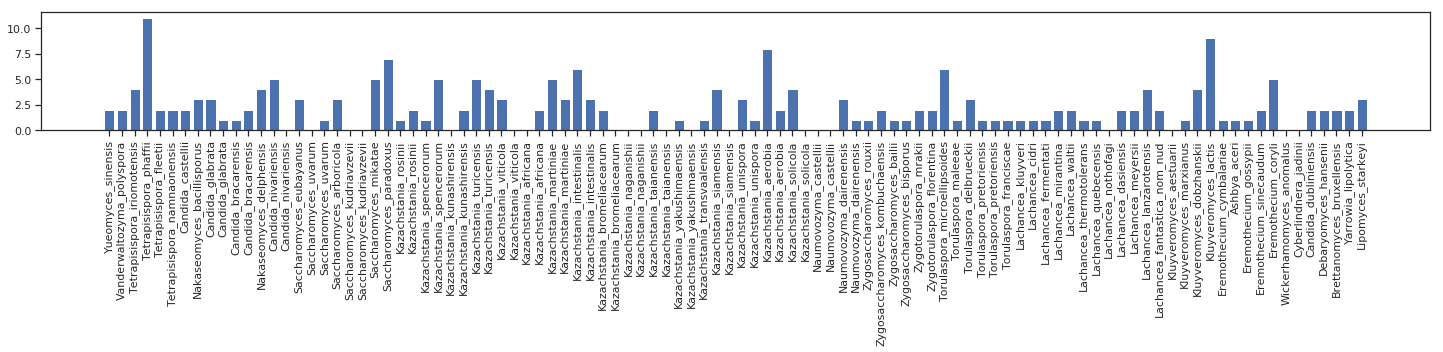

In [105]:
#Constrain search to a certain length


# Scan motifs 
output_format = 'full'
motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'}   
sequence_context = 2
L_prom = 1000

og = "OG1859" # #1859 = MPC2/MPC3 'OG3790' #'OG3991'


promoters_fnames = os.listdir(data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets') )

og_promoter_fnames = { fname.split('_')[0] : fname for fname in promoters_fnames }

promoters_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/promoter_sets/') + os.sep + og_promoter_fnames[og]

proms = io_library.exact_promoter_scan_from_fasta(promoters_fname, motif_dict, output_format = output_format, sequence_context = sequence_context, seq_key_func=seq_key_func, L_prom = L_prom)

proms['spec_genome_name'] = [item.split('@')[0] for item in proms.index]

proms.index.name = 'seq_id'
proms.reset_index(inplace=True)
merge_columns = y1000_species.loc[:,['original_genome_id', 'speceis_names_fig2']].rename(columns={'original_genome_id':'spec_genome_name', 'speceis_names_fig2': 'species_names_fig2'})
proms = proms.merge(merge_columns, how = 'left', on = 'spec_genome_name')

sort_dict = {spec_name: jj for jj, spec_name in enumerate(tree_order_plus_extra)}
sort_column = [sort_dict[spec_name] for spec_name in proms['species_names_fig2']]
proms['sort_column'] = sort_column
proms_sorted = proms.sort_values(by='sort_column')


fig, ax = plt.subplots(figsize = (20,5)) 

ax.bar(x = range(0,len(proms_sorted)), height=proms_sorted.TATA_count, tick_label = proms_sorted.species_names_fig2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.tight_layout()
#' + og + '_' + sc_common_names_str + '.fasta'
                           
    
# visualize 

# Usespecies order and display phylogenetic tree of 



In [106]:
#Coding Sequences or Peptide sequences from big file

#Table to look up species by number (this is also used for promoters): 
genome_name_lookup = dict(zip(y1000_species_subset['spec_og_id'],y1000_species_subset['original_genome_id']))

#For a given S.C. Paralog Pair, 

#check that orthogroup is shared between paralogs

#Extract orthogroup  given orthogroup

og = "OG1859"       #"OG1299" # CDC19/PYK2     #"OG3790"  # CYC1/CYC7

og_genes = og_genes_lookup[og]


#dict to lookup S.Cer genes - this only captures one of the genes since the original dict is 2:1
og_goi_lookup = {og : goi for goi, og in goi_og_lookup.items()}

#For each gene in orthogroup, group by species, open PEP file, extract sequence and save as fasta

sc_common_names = ohnologs_goi_og_genes.loc[((ohnologs_goi_og_genes['OG_index_high']== og_goi_lookup[og]) | (ohnologs_goi_og_genes['OG_index_low']==og_goi_lookup[og])) , ['SC_common_name_low', 'SC_common_name_high']] 
sc_common_names_str = '_'.join(sc_common_names.values[0])

proteins_og_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/proteins_og/' + og + '_' + sc_common_names_str + '.fasta')

with open(proteins_og_fname,'w') as f: 
    # group by species
    og_genes_specs = {spec_gene.split('_')[0]: [] for spec_gene in og_genes}
    for y1000_id in og_genes: 
        spec_og_id = y1000_id.split('_')[0]
        og_genes_specs[spec_og_id].append(y1000_id)

    #for each species in the group, gather promoters.  Extract promoter, print promoter as a line in a fasta file
    #>spec y1000_id gene_id gene_full chrm strand start end L
    for spec_og_id, genes in og_genes_specs.items(): 
        genome_name = genome_name_lookup[spec_og_id]
        print(genome_name)
        #if S.Cer skip finding protein sequences, 
        
        ## Should add protein sequences in case it is s.cer
        
        if genome_name != 'saccharomyces_cerevisiae':    
            #load gene_id map based on the species
            gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
            gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')

            #Extract peptide sequences from peptide fasta from genome
            protein_dir = "/home/heineike/genomes/y1000plus/0_332yeast_genomes/332_genome_annotations/pep/"

            protein_fname = protein_dir + genome_name + '.max.pep'

            seq_records = SeqIO.parse(protein_fname, "fasta")
            
            genes_lookup = gene_lookup_spec.loc[genes]
            genes_lookup_set = set(gene_lookup_spec.loc[genes,'gene_full'].values)
            
            for seq_record in seq_records:
                #gene_full = 'augustus_masked-Deha2C-processed-gene-4.36'
                gene_full = seq_record.description.split()[1].split('=')[1]
                #print(gene_full)
                if (gene_full in genes_lookup_set):
                    #find which y1000_id was matched
                    y1000_rlookup = genes_lookup['gene_full'] == gene_full
                    for gene, tf in y1000_rlookup.items(): 
                        if tf:
                            y1000_id=gene
                    gene_id = genes_lookup.loc[y1000_id, 'gene_id']
                    protein_seq = seq_record.seq
                    f.write('>' + genome_name + '_' + gene_id + ' y1000_id=' + y1000_id + ' gene_full=' + gene_full +
                            ' ' + seq_record.description.split()[2] + #this adds in the cds from the original description
                            '\n')
                    f.write(str(protein_seq) + '\n')  #I wonder why some of the bases were in lower case





#Sort into species
#For each species, go into CDS file and extract
#also could go into PEP file and extract (which one is better for MSA?)

eremothecium_sinecaudum
saccharomyces_mikatae
yHMPu5000026256_zygotorulaspora_mrakii_161215
kluyveromyces_marxianus
lachancea_thermotolerans
candida_dubliniensis
eremothecium_coryli
yHAB159_kazachstania_solicola_160519
nakaseomyces_nivariensis
wickerhamomyces_anomalus
yHMPu5000034877_tetrapisispora_namnaonensis_160519
naumovozyma_castellii
vanderwaltozyma_polyspora
yHAB155_kazachstania_spencerorum_160519
tetrapisispora_phaffii
yHMPu5000034865_zygosaccharomyces_kombuchaensis_160519
yHMPu5000035652_torulaspora_maleeae_160613
kazachstania_africana
yHAB134_kazachstania_turicensis_160519
torulaspora_delbrueckii
nakaseomyces_bacillisporus
lipomyces_starkeyi
ashbya_aceri
nakaseomyces_castellii
saccharomyces_kudriavzevii
kluyveromyces_lactis
yHAB153_kazachstania_rosinii_160519
yHMPu5000034881_torulaspora_pretoriensis_160519
lachancea_kluyveri
eremothecium_cymbalariae
yHAB158_kazachstania_viticola_160519
dekkera_bruxellensis
yHMPu5000034709_kluyveromyces_aestuarii_160519
yHMPu5000034710_kluyver

Tree Construction Notes: 
Individual gene tree inference
Individual gene trees were reconstructed using maximum likelihood (ML) analysis. For each gene, we conducted 10 independent tree
searches (5 used starting trees inferred by parsimony and the other 5 used random starting trees) to obtain the best-scoring ML tree
using RAxML, multithread version 8.2.3 (Stamatakis, 2014), under the best-fitting model of amino acid substitution selected by the
IQ-TREE program (option -m TEST -mrate G4) with the Bayesian information criterion (BIC).


The 2408OG orthologous group data matrix was constructed based on a 5-step workflow.
In step 1, we used all protein sequences of the 2,012,541 genes present in the 332 budding yeasts and 11 outgroups to perform an
all-versus-all search using BLASTP with an e-value cutoff of 1010. We then used the BLASTP results to cluster homologous protein
sequences using the Markov Cluster (MCL) algorithm implemented in OrthoMCL, version 2.0 (Li et al., 2003); we adopted the widely
used inflation parameter of 1.5 for two reasons. First, this inflation parameter value was found to be the optimal one in a previous
evaluation of the effects of different inflation parameter values on orthology assignment in the budding yeasts (Salichos and Rokas,
2011). Second, our examination of a range of different inflation parameter values (from 1.2 to 2.0, with a step of 0.1) showed that all
values led to the generation of nearly sets of clusters of homologous genes. OrthoMCL clustering resulted in the identification of
171,715 singleton clusters that contain a single protein and 61,763 clusters that contain two or more proteins. Plotting of the distributions of the lengths of genomic contigs that contain the 171,715 singleton clusters and 61,763 clusters with two or more proteins
showed that the two distributions were very similar. Retaining only those clusters with gene occupancy R 50%, that is those clusters
that were present in at least half (R172) of the 343 genomes (332 budding yeasts and 11 outgroups), resulted in the identification of
4,036 putative OGs.

In step 2, we inspected these 4,036 putative OGs for the presence of two or more sequences (i.e., paralogous sequences) from a
taxon. For each putative OG, we first aligned its protein sequences using the program MAFFT, version 7.299 (Katoh and Standley,
2013), with the parameters ‘‘–auto’’ and ‘‘–maxiterate 1000’’ and removed columns whose site occupancy was less than 0.01 from
the resultant alignment using the program Phyutility, version 2.2.6 (Smith and Dunn, 2008), with the parameters ‘‘-aa’’ and ‘‘-clean
0.01.’’ We then used each trimmed OG alignment to reconstruct a quick but ‘‘approximate’’ maximum likelihood (ML) tree using
the program FastTree, version 2.1.9 (Price et al., 2010), with the LG model of amino acid substitutions (Le and Gascuel, 2008), a
discrete gamma approximation with 20 categories (-gamma), 4 rounds of minimum-evolution subtree-prune-regraft moves
(-spr 4), and the more exhaustive ML nearest-neighbor interchange option enabled (-mlacc 2 -slownni). 



Whenever there were 2 or
more protein sequences from a specific taxon in a given OG, we identified the best (i.e., putatively orthologous) one by using a
tree-based method (maximally inclusive subtree) implemented in PhyloTreePruner, version 1.0 with a minimum internal support value
of 0.95 (Kocot et al., 2013). This resulted in the retention of 2,908 OGs with gene occupancy R 50%.


In step 3, we performed multiple sequence alignment for each of the 2,908 OGs using the E-INS-i strategy (–genafpair–maxiterate
1000) as implemented by the program MAFFT, version 7.299 (Katoh and Standley, 2013), and excluded ambiguously aligned regions
using trimAl v1.4 with the ‘‘gappyout’’ option on (Capella-Gutie´rrez et al., 2009). We then examined all the resulting alignments and
removed protein sequences whose lengths were shorter than 50% the length of the trimmed multiple sequence alignment length of
e5 Cell 175, 1533–1545.e1–e11, the OG to which they belonged. We also removed OGs whose total trimmed multiple sequence alignment length was < 167 amino
acid sites. These filters resulted in the retention of 2,424 OGs, each of which had R 50% gene occupancy and R 167 amino acid site
alignment length.
In step 4, to minimize the inclusion of potentially spurious sequences, we inferred an ML phylogram for each OG using IQ-TREE
1.5.1 (Nguyen et al., 2015) with an automatic detection for the best-fitting model of amino acid evolution and then used the ML phylogram to identify and to remove all protein sequences that resulted in terminal branch lengths that were at least 20-times longer than
the median of all terminal branch lengths across the phylogram. This step led to the removal of 421 potentially spurious sequences
from 292 OGs; the remaining 2,132 OGs did not contain any spurious sequences.
In the final step (step 5), we redid mutiple sequence alignment and trimming for those 292 OGs that we removed as spurious sequences as part of step 4. From the 292 OGs, 276 OGs retained R 50% gene occupancy and R 167 amino acid site alignment length
and, thus, were kept; the remaining 16 were discarded.
Retention of the 2,132 OGs from step 4 and the 276 OGs from step 5 yielded a final data matrix consisting of 2,408 orthologous
groups (OGs) (1,162,805 amino acid sites) of genes from the 332 budding yeast taxa and 11 outgroups.

This seems like a good way to start: 

Initial Mafft command: 
In step 3, we performed multiple sequence alignment for each of the 2,908 OGs using the E-INS-i strategy (–genafpair–maxiterate
1000) as implemented by the program MAFFT, version 7.299 (Katoh and Standley, 2013),





Potentially useful filters: 
and excluded ambiguously aligned regions
using trimAl v1.4 with the ‘‘gappyout’’ option on (Capella-Gutierrez et al., 2009). We then examined all the resulting alignments and
removed protein sequences whose lengths were shorter than 50% the length of the trimmed multiple sequence alignment length of the OG to which they belonged. We also removed OGs whose total trimmed multiple sequence alignment length was < 167 amino
acid sites. These filters resulted in the retention of 2,424 OGs, each of which had R 50% gene occupancy and R 167 amino acid site

In [ ]:
For the Tree this seems like a good place to start: 
    
In step 4, to minimize the inclusion of potentially spurious sequences, we inferred an ML phylogram for each OG using IQ-TREE
1.5.1 (Nguyen et al., 2015) with an automatic detection for the best-fitting model of amino acid evolution and then used the ML phylogram to identify and to remove all protein sequences that resulted in terminal branch lengths that were at least 20-times longer than
the median of all terminal branch lengths across the phylogram. This step led to the removal of 421 potentially spurious sequences
    

In [107]:
#Make tree: 

#Use Mafft to construct an MSA
og_fname_base = "OG1859_MPC2_FMP43"

#Command: 
mafft_command = ['mafft', '--genafpair', '--maxiterate', '1000', 
                data_processing_dir + os.path.normpath('promoter_phylogeny/proteins_og/' + og_fname_base + '.fasta'), 
                '>',
                data_processing_dir + os.path.normpath('promoter_phylogeny/proteins_og/' + og_fname_base + '_aln.fasta')]

#Running it from this notebook seems slow
#!{" ".join(mafft_command)}

print(" ".join(mafft_command))

#This is the E-ENS-i algorithm which is suitable for conserved regions separated by long unaligned gaps. https://mafft.cbrc.jp/alignment/software/algorithms/algorithms.html
#tree command: (designated outgroup)

outgroup_gene = None
for gene_id in proms_sorted['seq_id']:
    genome_name = gene_id.split('@')[0]
    if genome_name == 'yarrowia_lipolytica':
        outgroup_gene = genome_name + '_' + gene_id.split('@')[1]
        
if outgroup_gene == None: 
    print('No yarrowia_lipolytica ortholog - need to pick a different outgroup')

iqtree_command = ["iqtree", 
                  "-s" , data_processing_dir + os.path.normpath('promoter_phylogeny/proteins_og/' + og_fname_base + '_aln.fasta'),
                  "-nt", "AUTO",  #automatically determines number of threads 
                  "-o", outgroup_gene]
print(" ".join(iqtree_command))

#Current trimming protocol - open up on Jalview and trim by eye. Save as _trimmed.aln, then find and replace
# all "/" at the end of each gene name with a space. 


#Use the MSA to build a tree

#from that tree for all post WGD species, 
    #see if gene is closer to "low" or "high" goi.  Assign pre_wgh, low, or high label
    #could verify that outgroup doesn't appear between target and S.Cer low or high gene as well. 
    
#Order search results based on the tree


mafft --genafpair --maxiterate 1000 /home/heineike/github/expression_broad_data/expression_data/promoter_phylogeny/proteins_og/OG1859_MPC2_FMP43.fasta > /home/heineike/github/expression_broad_data/expression_data/promoter_phylogeny/proteins_og/OG1859_MPC2_FMP43_aln.fasta
iqtree -s /home/heineike/github/expression_broad_data/expression_data/promoter_phylogeny/proteins_og/OG1859_MPC2_FMP43_aln.fasta -nt AUTO -o yarrowia_lipolytica_Seq_4357


In [60]:
L_prom = 1000

width = 10

gene_id = '_'.join(node.name.split('_')[:-2]) + '@' + '_'.join(node.name.split('_')[-2:])
prom_results = proms_sorted.set_index('seq_id').loc[gene_id]
prom_results['STRE_count'] >0
motifs = []
for motif in prom_results['STRE_full_features']:
    loc = motif[0]
    direction = motif[1]
    shape = '>'
    start = L_prom-loc
    stop = L_prom-loc + 5
    if direction == 'rev':
        shape = '<'
        start = L_prom-loc-5
        stop = L_prom -loc
    
    motif.append([L_prom-loc, L_prom-loc,shape,None, width, "black", "red", None])
        
    

TypeError: 'NoneType' object is not iterable

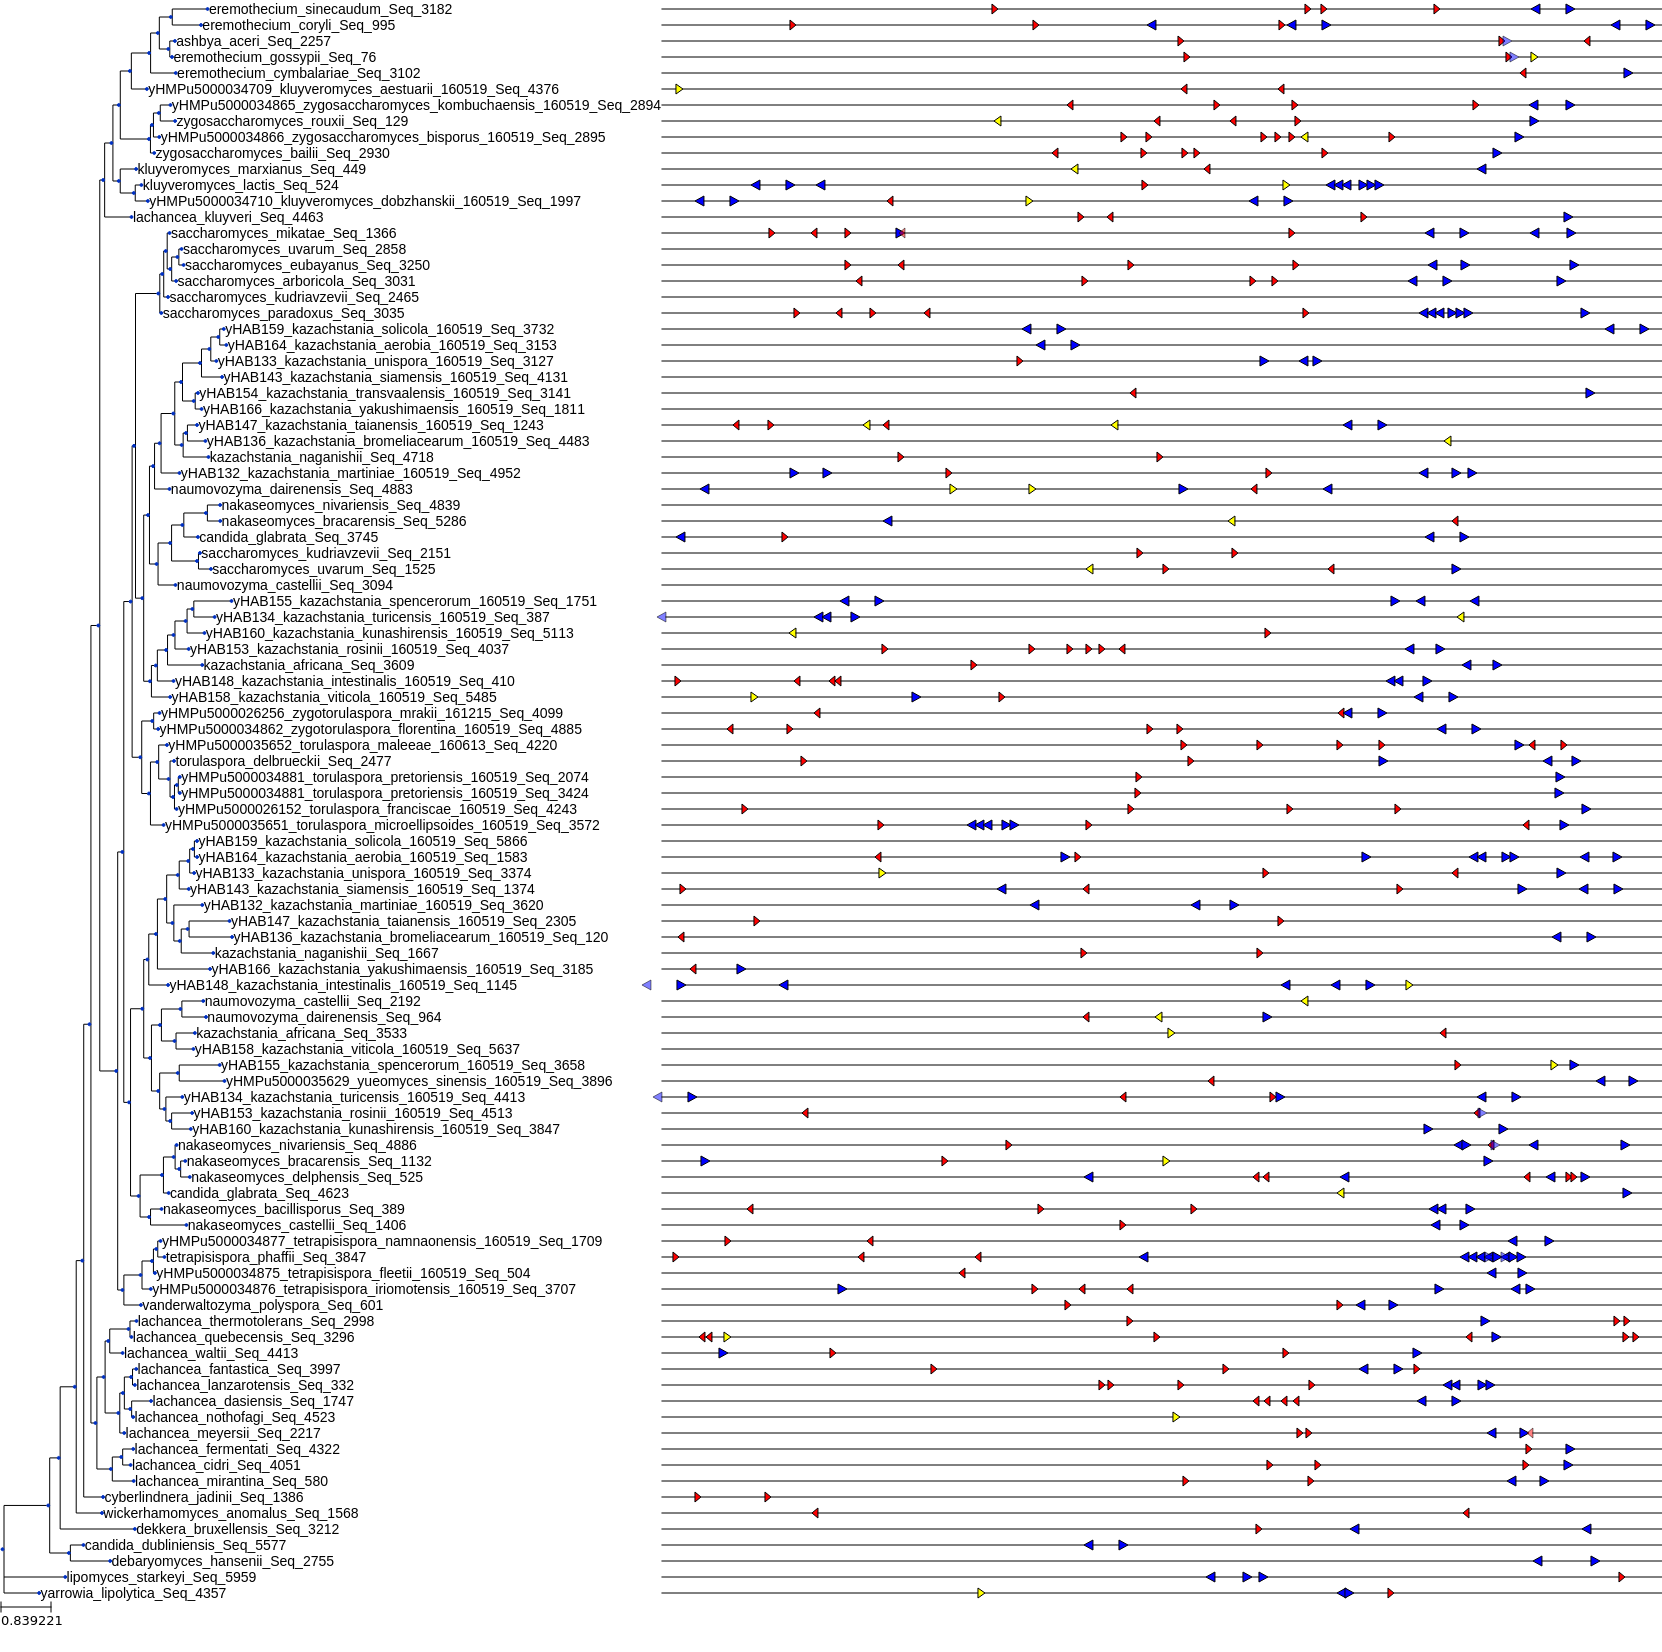

In [134]:
#Visualize the tree with sequence next to it
tree_fname = data_processing_dir + os.path.normpath('promoter_phylogeny/proteins_og/OG1859_MPC2_FMP43_aln_trimmed.fasta.treefile')
t = Tree(tree_fname)
L_prom = 1000
height = 10
seq = '-'*L_prom

motif_colors = {'PDS': 'yellow', 'TATA': 'blue', 'STRE': 'red'}
motif_lengths = {'PDS': 6, 'TATA': 8, 'STRE': 5 }

#For each node in the tree:
for node in t.iter_leaves():  
    #Get the promoter sequence with motif info, make it into a motif list
    
    gene_id = '_'.join(node.name.split('_')[:-2]) + '@' + '_'.join(node.name.split('_')[-2:])
    prom_results = proms_sorted.set_index('seq_id').loc[gene_id]
    
#     simple_motifs = [
#             # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
#             [10, 60, ">", None, 10, "black", "red", None],
#             [120, 150, "<", None, 10, "black", "red", None]
#     ]
    gene_id = '_'.join(node.name.split('_')[:-2]) + '@' + '_'.join(node.name.split('_')[-2:])
    prom_results = proms_sorted.set_index('seq_id').loc[gene_id]
    motifs = []
    
    for motif_name in ['PDS', 'TATA', 'STRE']: 
        motif_len = motif_lengths[motif_name]
        motif_color = motif_colors[motif_name]
        if prom_results[motif_name + '_count'] >0:

            for motif in prom_results[motif_name + '_full_features']:
                loc = motif[0]
                direction = motif[1]
                shape = '>'
                start = L_prom-loc
                stop = L_prom-loc + motif_len
                if direction == 'rev':
                    shape = '<'
                    start = L_prom-loc-motif_len
                    stop = L_prom -loc
                motifs.append([start,stop,shape,None, height, "black", motif_color, None])

    seqFace = SeqMotifFace(seq, motifs=motifs, seq_format="-")
    node.add_face(seqFace, 0, "aligned")
    #(t & "E").add_face(seqFace, 0, "aligned")


t.render('%%inline')

In [4]:
from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node

seq = ("-----------------------------------------------AQAK---IKGSKKAIKVFSSA---"
      "APERLQEYGSIFTDA---GLQRRPRHRIQSK-------ALQEKLKDFPVCVSTKPEPEDDAEEGLGGLPSN"
      "ISSVSSLLLFNTTENLYKKYVFLDPLAG----THVMLGAETEEKLFDAPLSISKREQLEQQVPENYFYVPD"
      "LGQVPEIDVPSYLPDLPGIANDLMYIADLGPGIAPSAPGTIPELPTFHTEVAEPLKVGELGSGMGAGPGTP"
      "AHTPSSLDTPHFVFQTYKMGAPPLPPSTAAPVGQGARQDDSSSSASPSVQGAPREVVDPSGGWATLLESIR"
      "QAGGIGKAKLRSMKERKLEKQQQKEQEQVRATSQGGHL--MSDLFNKLVMRRKGISGKGPGAGDGPGGAFA"
      "RVSDSIPPLPPPQQPQAEDED----")

mixed_motifs = [
        # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
        [10, 100, "[]", None, 10, "black", "rgradient:blue", "arial|8|white|long text clipped long text clipped"],
        [101, 150, "o", None, 10, "blue", "pink", None],
        [155, 180, "()", None, 10, "blue", "rgradient:purple", None],
        [160, 190, "^", None, 14, "black", "yellow", None],
        [191, 200, "<>", None, 12, "black", "rgradient:orange", None],
        [201, 250, "o", None, 12, "black", "brown", None],
        [351, 370, "v", None, 15, "black", "rgradient:gold", None],
        [370, 420, "compactseq", 2, 10, None, None, None],
]

simple_motifs = [
        # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
        [10, 60, "[]", None, 10, "black", "rgradient:blue", "arial|8|white|long text clipped long text clipped"],
        [120, 150, "o", None, 10, "blue", "pink", None],
        [200, 300, "()", None, 10, "blue", "red", "arial|8|white|hello"],
]

box_motifs = [
        # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
        [0,  5, "[]", None, 10, "black", "rgradient:blue", "arial|8|white|10"],
        [10, 25, "[]", None, 10, "black", "rgradient:ref", "arial|8|white|10"],
        [30, 45, "[]", None, 10, "black", "rgradient:orange", "arial|8|white|20"],
        [50, 65, "[]", None, 10, "black", "rgradient:pink", "arial|8|white|20"],
        [70, 85, "[]", None, 10, "black", "rgradient:green", "arial|8|white|20"],
        [90, 105, "[]", None, 10, "black", "rgradient:brown", "arial|8|white|20"],
        [110, 125, "[]", None, 10, "black", "rgradient:yellow", "arial|8|white|20"],
]

def get_example_tree():
        # Create a random tree and add to each leaf a random set of motifs
        # from the original set
        t = Tree("( (A, B, C, D, E, F, G), H, I);")

        seqFace = SeqMotifFace(seq, gapcolor="red")
        (t & "A").add_face(seqFace, 0, "aligned")

        seqFace = SeqMotifFace(seq, seq_format="line", gap_format="blank")
        (t & "B").add_face(seqFace, 0, "aligned")

        seqFace = SeqMotifFace(seq, seq_format="line")
        (t & "C").add_face(seqFace, 0, "aligned")
        
        seqFace = SeqMotifFace(seq, seq_format="()")
        (t & "D").add_face(seqFace, 0, "aligned")

        seqFace = SeqMotifFace(seq, motifs=simple_motifs, seq_format="-")
        (t & "E").add_face(seqFace, 0, "aligned")

        seqFace = SeqMotifFace(seq=None, motifs=simple_motifs, gap_format="blank")
        (t & "F").add_face(seqFace, 0, "aligned")

        seqFace = SeqMotifFace(seq, motifs=mixed_motifs, seq_format="-")
        (t & "G").add_face(seqFace, 0, "aligned")

        
        seqFace = SeqMotifFace(seq=None, motifs=box_motifs, gap_format="line")
        (t & "H").add_face(seqFace, 0, "aligned")


        seqFace = SeqMotifFace(seq[30:60], seq_format="seq")
        (t & "I").add_face(seqFace, 0, "aligned")
        
        return t
        


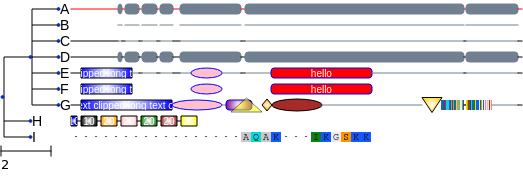

In [5]:
t = get_example_tree()
ts = TreeStyle()
ts.tree_width = 50
t.render("%%inline", tree_style = ts)
#t.show(tree_style=ts)
##t.render("seq_motif_faces.png", tree_style=ts)

Note:  The curated 2408OGs don't include paralogs and only had 8 of my 91 genes: 
from low set: ['SKT5', 'SDT1', 'RTN1', 'SEC14', 'VRG4', 'SCS2', 'VPS21']

from high set: ['POR1']

I shifted to the raw orthoMCL output


In [22]:
io_library.SC_common_name_lookup(gene_set_OGs_low.keys())

['SKT5', 'SDT1', 'RTN1', 'SEC14', 'VRG4', 'SCS2', 'VPS21']

In [ ]:
#Cyc7 / Cy1
110_4582
110_1867  CYC1
OG3790
line = "OG3790: 0_1647 100_1735 101_3648 102_7768 103_4731 104_4156 105_2429 106_599 107_265 109_1835 10_8266 110_1867 111_3240 112_3591 113_4331 114_2508 115_3840 116_566 117_6939 118_541 11_3131 121_836 122_3927 123_2251 127_709 128_1626 129_2884 12_3691 130_4682 131_2614 132_4104 133_4208 134_1302 135_2052 136_3043 139_4582 13_447 140_5335 141_4054 142_3823 143_4429 144_5420 145_4975 146_3619 147_2390 148_1276 149_2617 14_1410 150_3556 151_2336 152_338 153_753 154_137 155_483 156_2943 157_4396 158_3228 159_4783 160_4777 161_2184 162_36 163_4502 164_2300 165_1071 166_1844 167_4175 168_2993 169_5097 16_3588 170_4273 171_1495 173_1329 174_2495 175_4145 176_1524 177_146 178_753 179_1507 180_181 181_4131 182_3147 183_1684 184_4533 185_4343 186_81 188_3435 189_1226 18_3405 190_505 191_1461 192_4689 195_9704 196_2429 19_1239 1_5099 200_2666 200_4672 201_6379 202_1412 203_3114 204_5755 205_2857 206_2975 207_390 208_1542 209_6080 210_1585 211_1073 212_1842 213_1656 214_3289 215_7539 216_5366 216_6862 217_704 218_2456 219_3595 21_3744 220_2607 221_5101 222_1602 223_4721 224_1170 225_1427 226_175 227_5622 228_2021 229_882 230_2110 231_4172 232_1562 233_242 233_75 234_3038 235_4285 236_2197 237_518 238_1851 238_2328 239_4559 23_4476 240_1478 241_501 242_392 243_869 244_2350 245_1653 246_4047 247_4026 248_2615 249_5212 24_2279 251_3222 252_4292 253_1754 255_2178 257_2357 258_4250 261_3391 265_2083 266_4770 267_2446 268_4827 269_1725 26_2231 270_2199 271_169 272_2474 273_3049 274_1070 275_24 276_3693 277_3454 278_4921 279_397 27_3408 280_5722 281_3067 282_2562 283_4052 286_465 289_1389 291_4273 292_3030 293_2740 295_804 296_4363 297_4179 298_2642 299_2878 2_7709 300_2022 301_282 302_2067 303_556 305_2116 306_3637 307_5814 308_1403 309_802 310_539 311_3352 312_2154 316_894 317_1127 318_3027 319_1147 31_2982 320_1421 321_5069 322_5624 323_2032 324_452 325_1480 326_4579 332_5457 333_5228 336_3197 33_7216 341_4032 342_348 34_1968 35_2205 37_2121 37_3764 38_3581 39_631 3_944 40_1426 41_3903 42_12512 43_2344 43_3230 44_2537 45_1542 46_1872 48_3761 49_4824 4_5023 50_2030 51_1859 52_1092 53_4619 54_2773 55_947 56_3413 57_3796 58_1323 59_4035 5_4093 60_3188 61_381 62_1335 63_3839 64_2316 65_3185 66_8611 67_3718 68_2146 6_4383 75_241 76_624 77_249 7_2884 84_5842 85_465 93_3490 94_1111 95_1270 96_555 97_1028 98_1536 99_2024 9_3296 72_5035 101_3081 78_2800 86_3180 100_2846 158_1999 110_4582 156_540 188_3709 93_2103 109_2235 111_3195 112_3736 113_1818 114_1115 115_3813 209_4584 157_3362 145_5247 150_3307 147_471 146_2097 49_1153 154_4284 155_1768"

# Analysis for promoters from regev data. 

In [133]:
#Visualise phylogeny for species in Regev data: 
fname_tree = y1000plus_dir + "332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick"
yeast_tree = Tree(fname_tree)
post_WGH_specs = ['Saccharomyces_cerevisiae','Saccharomyces_paradoxus','Saccharomyces_mikatae','Saccharomyces_uvarum', 'Candida_glabrata', 'Naumovozyma_castellii','Vanderwaltozyma_polyspora']
pre_WGH_specs = ['Kluyveromyces_lactis','Lachancea_waltii','Lachancea_kluyveri','Debaryomyces_hansenii', 'Candida_albicans','Yarrowia_lipolytica']
yeast_tree.prune(pre_WGH_specs, preserve_branch_length=True)
print(yeast_tree)



         /-Debaryomyces_hansenii
      /-|
     |   \-Candida_albicans
   /-|
  |  |      /-Lachancea_kluyveri
  |  |   /-|
--|   \-|   \-Lachancea_waltii
  |     |
  |      \-Kluyveromyces_lactis
  |
   \-Yarrowia_lipolytica


In [ ]:
#Pick out only species from regev data

#Make files for promoters for all genes

#Make promoter files for orthologs of DEPKA 
#Mapping from Regev ortholog mapping to various genomes.

#count STRE/TATA/PDS in all these orthologs

#Visualize in same order as 